## Asumsi
1. Setiap State hanya memiliki 1 gudang/inventory 
2. Lead Time memiliki nilai konstan
2. Lead Time dijadikan input pengguna karena keterbatasan data
3. Demand merupakan distribusi normal untuk perhitungan Safety Stock

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("Coffee_Chain_Sales.csv")
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [87]:
print(df['State'].unique())

['Colorado' 'Texas' 'Florida' 'California' 'Iowa' 'Connecticut' 'Oklahoma'
 'Nevada' 'Utah' 'New Hampshire' 'Louisiana' 'Oregon' 'Missouri'
 'Wisconsin' 'Washington' 'Massachusetts' 'Illinois' 'New Mexico' 'Ohio'
 'New York']


In [221]:
# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Menghitung permintaan harian rata-rata dan standar deviasi harian untuk setiap produk di setiap area
daily_stats = df.groupby(['State', 'Product']).agg(
    daily_avg_demand=('Sales', 'mean'),
    std_daily_demand=('Sales', 'std')
).reset_index()

# Menentukan biaya pemesanan (OC) dan biaya penyimpanan (CC)
OC = 100  
CC = 2   

# Mengasumsikan lead time (L) dalam hari
L = 7

# asumsi target tingkat layanan 95%
Z = 1.65

daily_stats['Service Level'] = '95%'
daily_stats['Lead Time'] = L

annual_demand = np.ceil(daily_stats['daily_avg_demand'] * 365)

daily_stats['Yearly Demand'] = annual_demand

daily_stats['EOQ'] = np.ceil(np.sqrt((2 * annual_demand * OC) / CC))

# Menghitung Safety Stock (SS)
daily_stats['Safety Stock'] = np.ceil(Z * daily_stats['std_daily_demand'] * np.sqrt(L))

# Menghitung Reorder Point (ROP)
daily_stats['ROP'] = np.ceil(( daily_stats['daily_avg_demand'] * L) + daily_stats['Safety Stock'])

# Menampilkan hasil
display(daily_stats)


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
0,California,Amaretto,112.666667,7.633261,95%,7,41124.0,2028.0,34.0,823.0
1,California,Caffe Latte,482.666667,40.618551,95%,7,176174.0,4198.0,178.0,3557.0
2,California,Caffe Mocha,313.000000,19.141578,95%,7,114245.0,3381.0,84.0,2275.0
3,California,Chamomile,231.666667,33.862467,95%,7,84559.0,2908.0,148.0,1770.0
4,California,Colombian,679.000000,42.787849,95%,7,247835.0,4979.0,187.0,4940.0
...,...,...,...,...,...,...,...,...,...,...
172,Wisconsin,Darjeeling,116.666667,7.633261,95%,7,42584.0,2064.0,34.0,851.0
173,Wisconsin,Decaf Espresso,54.666667,3.204164,95%,7,19954.0,1413.0,14.0,397.0
174,Wisconsin,Decaf Irish Cream,198.666667,12.420413,95%,7,72514.0,2693.0,55.0,1446.0
175,Wisconsin,Earl Grey,145.333333,9.309493,95%,7,53047.0,2304.0,41.0,1059.0


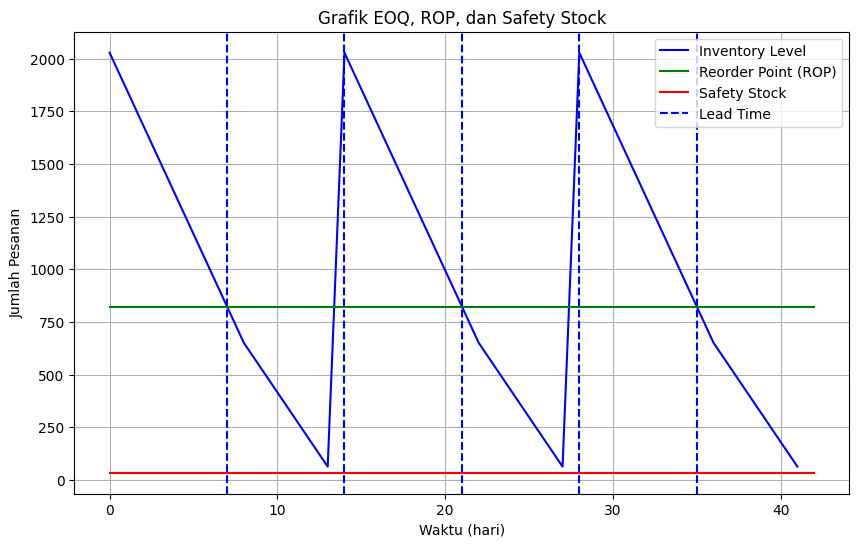

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Asumsi variabel
order_quantity = daily_stats['EOQ'].values[0]
daily_demand = daily_stats['daily_avg_demand'].values[0]
rop = daily_stats['ROP'].values[0]
safety_stock = daily_stats['Safety Stock'].values[0]
lead_time = L  # Asumsi waktu lead time

# Plotting garis
num_cycles = 3  
time = np.arange(0, num_cycles * lead_time * 2, 1) 
inventory_level = []

# Menghitung level inventaris pada setiap waktu
current_inventory = order_quantity
for t in time:
    inventory_level.append(current_inventory)
    if t % (lead_time * 2) == lead_time * 2 - 1:
        current_inventory = order_quantity  
    else:
        if current_inventory > rop and t % lead_time < lead_time:
            current_inventory -= (order_quantity - rop) / lead_time
        elif current_inventory > 0:
            current_inventory -= rop / lead_time
        if current_inventory < 0:
            current_inventory = 0

# Membuat plot
plt.figure(figsize=(10, 6))

# Melanjutkan garis inventory plot
plt.plot(time, inventory_level, 'b-', label='Inventory Level')

# Plotting Reorder Point (ROP)
plt.plot([0, num_cycles * lead_time * 2], [rop, rop], 'g-', label='Reorder Point (ROP)')

# Plotting Safety Stock (SS)
plt.plot([0, num_cycles * lead_time * 2], [safety_stock, safety_stock], 'r-', label='Safety Stock')

# Plotting Lead Time (LT)
for t in range(lead_time, num_cycles * lead_time * 2, lead_time):
    plt.axvline(x=t, color='b', linestyle='--', label='Lead Time' if t == lead_time else "")
    
plt.title('Grafik EOQ, ROP, dan Safety Stock')
plt.xlabel('Waktu (hari)')
plt.ylabel('Jumlah Pesanan')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


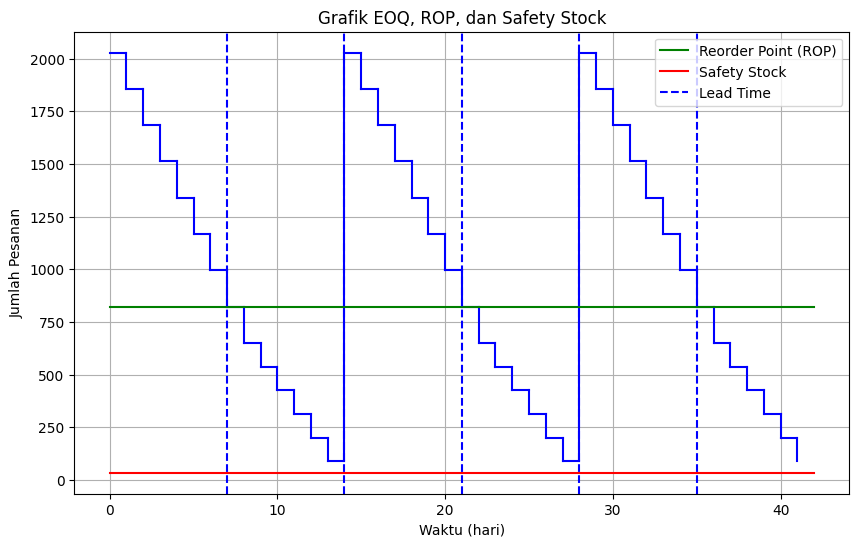

In [223]:
import numpy as np
import matplotlib.pyplot as plt

# Asumsi variabel
order_quantity = daily_stats['EOQ'].values[0]
daily_demand = daily_stats['daily_avg_demand'].values[0]
rop = daily_stats['ROP'].values[0]
safety_stock = daily_stats['Safety Stock'].values[0]
lead_time = L 

# Plotting garis
num_cycles = 3  # banyaknya cycle
time = np.arange(0, num_cycles * lead_time * 2, 1)  
inventory_level = []

# Menghitung level inventaris pada setiap waktu
current_inventory = order_quantity
daily_reduction = (order_quantity - rop) / lead_time

for t in time:
    inventory_level.append(current_inventory)
    if t % (lead_time * 2) == lead_time * 2 - 1:
        current_inventory = order_quantity 
    else:
        if current_inventory > rop:
            current_inventory -= daily_reduction
        elif current_inventory > safety_stock:
            current_inventory -= daily_demand
        if current_inventory < safety_stock:
            current_inventory = safety_stock

# Membuat plot
plt.figure(figsize=(10, 6))

# Plot inventory levels
for i in range(len(time) - 1):
    plt.plot([time[i], time[i + 1]], [inventory_level[i], inventory_level[i]], 'b-')
    if i + 1 < len(time):
        plt.plot([time[i + 1], time[i + 1]], [inventory_level[i], inventory_level[i + 1]], 'b-')

# Plotting Reorder Point (ROP) 
plt.plot([0, num_cycles * lead_time * 2], [rop, rop], 'g-', label='Reorder Point (ROP)')

# Plotting Safety Stock (SS)
plt.plot([0, num_cycles * lead_time * 2], [safety_stock, safety_stock], 'r-', label='Safety Stock')

# Plotting Lead Time (LT) 
for t in range(lead_time, num_cycles * lead_time * 2, lead_time):
    plt.axvline(x=t, color='b', linestyle='--', label='Lead Time' if t == lead_time else "")

plt.title('Grafik EOQ, ROP, dan Safety Stock')
plt.xlabel('Waktu (hari)')
plt.ylabel('Jumlah Pesanan')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


In [225]:

states = ['Colorado', 'Texas', 'Florida', 'California', 'Iowa', 'Connecticut', 'Oklahoma', 
          'Nevada', 'Utah', 'New Hampshire', 'Louisiana', 'Oregon', 'Missouri', 
          'Wisconsin', 'Washington', 'Massachusetts', 'Illinois', 'New Mexico', 'Ohio', 
          'New York']

for state in states:
    state_stats = daily_stats[daily_stats['State'] == state]
    print(f"Daily Stats for {state}:")
    display(state_stats)
    print("\n")

Daily Stats for Colorado:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
12,Colorado,Amaretto,307.833333,12.560520,95%,7,112360.0,3353.0,55.0,2210.0
13,Colorado,Caffe Mocha,152.500000,32.172970,95%,7,55663.0,2360.0,141.0,1209.0
14,Colorado,Chamomile,341.166667,29.714755,95%,7,124526.0,3529.0,130.0,2519.0
15,Colorado,Colombian,96.833333,5.671567,95%,7,35345.0,1881.0,25.0,703.0
16,Colorado,Darjeeling,119.500000,11.058933,95%,7,43618.0,2089.0,49.0,886.0
17,Colorado,Decaf Espresso,185.500000,11.708971,95%,7,67708.0,2603.0,52.0,1351.0
18,Colorado,Decaf Irish Cream,231.666667,33.862467,95%,7,84559.0,2908.0,148.0,1770.0
19,Colorado,Earl Grey,123.666667,6.088240,95%,7,45139.0,2125.0,27.0,893.0
20,Colorado,Green Tea,203.000000,11.815244,95%,7,74095.0,2723.0,52.0,1473.0
21,Colorado,Lemon,123.500000,7.609205,95%,7,45078.0,2124.0,34.0,899.0




Daily Stats for Texas:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
139,Texas,Caffe Latte,185.500000,11.708971,95%,7,67708.0,2603.0,52.0,1351.0
140,Texas,Caffe Mocha,307.833333,12.560520,95%,7,112360.0,3353.0,55.0,2210.0
141,Texas,Chamomile,133.500000,8.526429,95%,7,48728.0,2208.0,38.0,973.0
142,Texas,Colombian,528.333333,25.256022,95%,7,192842.0,4392.0,111.0,3810.0
143,Texas,Decaf Espresso,152.500000,32.172970,95%,7,55663.0,2360.0,141.0,1209.0
144,Texas,Decaf Irish Cream,96.833333,5.671567,95%,7,35345.0,1881.0,25.0,703.0
145,Texas,Lemon,110.833333,6.968979,95%,7,40455.0,2012.0,31.0,807.0




Daily Stats for Florida:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
30,Florida,Caffe Mocha,242.333333,15.002222,95%,7,88452.0,2975.0,66.0,1763.0
31,Florida,Chamomile,54.666667,3.204164,95%,7,19954.0,1413.0,14.0,397.0
32,Florida,Colombian,214.500000,13.663821,95%,7,78293.0,2799.0,60.0,1562.0
33,Florida,Darjeeling,82.333333,11.944315,95%,7,30052.0,1734.0,53.0,630.0
34,Florida,Decaf Espresso,198.666667,12.420413,95%,7,72514.0,2693.0,55.0,1446.0
35,Florida,Decaf Irish Cream,269.500000,49.786544,95%,7,98368.0,3137.0,218.0,2105.0
36,Florida,Green Tea,96.833333,20.093946,95%,7,35345.0,1881.0,88.0,766.0
37,Florida,Lemon,135.000000,12.759310,95%,7,49275.0,2220.0,56.0,1001.0
38,Florida,Mint,177.000000,8.579044,95%,7,64605.0,2542.0,38.0,1277.0




Daily Stats for California:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
0,California,Amaretto,112.666667,7.633261,95%,7,41124.0,2028.0,34.0,823.0
1,California,Caffe Latte,482.666667,40.618551,95%,7,176174.0,4198.0,178.0,3557.0
2,California,Caffe Mocha,313.000000,19.141578,95%,7,114245.0,3381.0,84.0,2275.0
3,California,Chamomile,231.666667,33.862467,95%,7,84559.0,2908.0,148.0,1770.0
4,California,Colombian,679.000000,42.787849,95%,7,247835.0,4979.0,187.0,4940.0
5,California,Darjeeling,307.833333,12.560520,95%,7,112360.0,3353.0,55.0,2210.0
6,California,Decaf Espresso,587.333333,37.135787,95%,7,214377.0,4631.0,163.0,4275.0
7,California,Decaf Irish Cream,161.333333,30.302915,95%,7,58887.0,2427.0,133.0,1263.0
8,California,Earl Grey,152.500000,32.172970,95%,7,55663.0,2360.0,141.0,1209.0
9,California,Green Tea,185.500000,11.708971,95%,7,67708.0,2603.0,52.0,1351.0




Daily Stats for Iowa:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
48,Iowa,Amaretto,45.500000,6.473021,95%,7,16608.0,1289.0,29.0,348.0
49,Iowa,Caffe Mocha,59.333333,2.422120,95%,7,21657.0,1472.0,11.0,427.0
50,Iowa,Chamomile,587.333333,37.135787,95%,7,214377.0,4631.0,163.0,4275.0
51,Iowa,Colombian,69.166667,3.488075,95%,7,25246.0,1589.0,16.0,501.0
52,Iowa,Darjeeling,482.666667,40.618551,95%,7,176174.0,4198.0,178.0,3557.0
53,Iowa,Decaf Espresso,44.500000,1.643168,95%,7,16243.0,1275.0,8.0,320.0
54,Iowa,Decaf Irish Cream,24.333333,1.211060,95%,7,8882.0,943.0,6.0,177.0
55,Iowa,Earl Grey,608.000000,57.327131,95%,7,221920.0,4711.0,251.0,4507.0
56,Iowa,Lemon,305.666667,18.991226,95%,7,111569.0,3341.0,83.0,2223.0




Daily Stats for Connecticut:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
23,Connecticut,Caffe Mocha,145.333333,9.309493,95%,7,53047.0,2304.0,41.0,1059.0
24,Connecticut,Colombian,319.166667,20.232812,95%,7,116496.0,3414.0,89.0,2324.0
25,Connecticut,Darjeeling,122.000000,16.297239,95%,7,44530.0,2111.0,72.0,926.0
26,Connecticut,Decaf Espresso,120.000000,7.509993,95%,7,43800.0,2093.0,33.0,873.0
27,Connecticut,Green Tea,79.833333,14.593377,95%,7,29140.0,1708.0,64.0,623.0
28,Connecticut,Lemon,177.000000,16.284962,95%,7,64605.0,2542.0,72.0,1311.0
29,Connecticut,Mint,148.333333,7.393691,95%,7,54142.0,2327.0,33.0,1072.0




Daily Stats for Oklahoma:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
121,Oklahoma,Caffe Latte,269.500000,49.786544,95%,7,98368.0,3137.0,218.0,2105.0
122,Oklahoma,Caffe Mocha,70.833333,13.257702,95%,7,25855.0,1608.0,58.0,554.0
123,Oklahoma,Chamomile,135.000000,12.759310,95%,7,49275.0,2220.0,56.0,1001.0
124,Oklahoma,Colombian,203.000000,11.815244,95%,7,74095.0,2723.0,52.0,1473.0
125,Oklahoma,Decaf Espresso,214.500000,13.663821,95%,7,78293.0,2799.0,60.0,1562.0
126,Oklahoma,Decaf Irish Cream,81.166667,10.962056,95%,7,29626.0,1722.0,48.0,617.0
127,Oklahoma,Lemon,242.333333,15.002222,95%,7,88452.0,2975.0,66.0,1763.0




Daily Stats for Nevada:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
79,Nevada,Caffe Latte,44.500000,1.643168,95%,7,16243.0,1275.0,8.0,320.0
80,Nevada,Caffe Mocha,45.500000,6.473021,95%,7,16608.0,1289.0,29.0,348.0
81,Nevada,Chamomile,313.000000,19.141578,95%,7,114245.0,3381.0,84.0,2275.0
82,Nevada,Colombian,82.333333,7.447595,95%,7,30052.0,1734.0,33.0,610.0
83,Nevada,Darjeeling,587.333333,37.135787,95%,7,214377.0,4631.0,163.0,4275.0
84,Nevada,Decaf Espresso,59.333333,2.422120,95%,7,21657.0,1472.0,11.0,427.0
85,Nevada,Decaf Irish Cream,69.166667,3.488075,95%,7,25246.0,1589.0,16.0,501.0
86,Nevada,Earl Grey,482.666667,40.618551,95%,7,176174.0,4198.0,178.0,3557.0
87,Nevada,Green Tea,28.833333,5.776389,95%,7,10525.0,1026.0,26.0,228.0
88,Nevada,Lemon,452.000000,81.397789,95%,7,164980.0,4062.0,356.0,3520.0




Daily Stats for Utah:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
146,Utah,Amaretto,148.333333,7.393691,95%,7,54142.0,2327.0,33.0,1072.0
147,Utah,Caffe Latte,81.500000,3.271085,95%,7,29748.0,1725.0,15.0,586.0
148,Utah,Caffe Mocha,234.333333,13.276546,95%,7,85532.0,2925.0,58.0,1699.0
149,Utah,Chamomile,123.833333,7.730890,95%,7,45200.0,2127.0,34.0,901.0
150,Utah,Colombian,120.000000,7.509993,95%,7,43800.0,2093.0,33.0,873.0
151,Utah,Darjeeling,114.666667,7.089899,95%,7,41854.0,2046.0,31.0,834.0
152,Utah,Decaf Espresso,122.000000,16.297239,95%,7,44530.0,2111.0,72.0,926.0
153,Utah,Decaf Irish Cream,177.000000,16.284962,95%,7,64605.0,2542.0,72.0,1311.0
154,Utah,Earl Grey,90.500000,5.753260,95%,7,33033.0,1818.0,26.0,660.0
155,Utah,Green Tea,61.000000,14.669697,95%,7,22265.0,1493.0,65.0,492.0




Daily Stats for New Hampshire:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
90,New Hampshire,Amaretto,123.833333,7.730890,95%,7,45200.0,2127.0,34.0,901.0
91,New Hampshire,Caffe Mocha,114.666667,7.089899,95%,7,41854.0,2046.0,31.0,834.0
92,New Hampshire,Colombian,118.666667,7.312090,95%,7,43314.0,2082.0,32.0,863.0
93,New Hampshire,Darjeeling,45.500000,6.473021,95%,7,16608.0,1289.0,29.0,348.0
94,New Hampshire,Green Tea,44.500000,1.643168,95%,7,16243.0,1275.0,8.0,320.0
95,New Hampshire,Lemon,82.333333,7.447595,95%,7,30052.0,1734.0,33.0,610.0
96,New Hampshire,Regular Espresso,61.000000,14.669697,95%,7,22265.0,1493.0,65.0,492.0




Daily Stats for Louisiana:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
57,Louisiana,Caffe Latte,145.333333,9.309493,95%,7,53047.0,2304.0,41.0,1059.0
58,Louisiana,Caffe Mocha,140.000000,24.770951,95%,7,51100.0,2261.0,109.0,1089.0
59,Louisiana,Chamomile,234.333333,13.276546,95%,7,85532.0,2925.0,58.0,1699.0
60,Louisiana,Colombian,122.000000,4.979960,95%,7,44530.0,2111.0,22.0,876.0
61,Louisiana,Decaf Espresso,116.666667,7.633261,95%,7,42584.0,2064.0,34.0,851.0
62,Louisiana,Decaf Irish Cream,96.833333,20.093946,95%,7,35345.0,1881.0,88.0,766.0
63,Louisiana,Lemon,177.000000,16.284962,95%,7,64605.0,2542.0,72.0,1311.0




Daily Stats for Oregon:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
128,Oregon,Amaretto,123.500000,7.609205,95%,7,45078.0,2124.0,34.0,899.0
129,Oregon,Caffe Latte,119.500000,11.058933,95%,7,43618.0,2089.0,49.0,886.0
130,Oregon,Caffe Mocha,133.500000,8.526429,95%,7,48728.0,2208.0,38.0,973.0
131,Oregon,Chamomile,63.333333,2.581989,95%,7,23117.0,1521.0,12.0,456.0
132,Oregon,Colombian,127.166667,21.985601,95%,7,46416.0,2155.0,96.0,987.0
133,Oregon,Darjeeling,70.833333,13.257702,95%,7,25855.0,1608.0,58.0,554.0
134,Oregon,Decaf Espresso,341.166667,29.714755,95%,7,124526.0,3529.0,130.0,2519.0
135,Oregon,Decaf Irish Cream,110.833333,6.968979,95%,7,40455.0,2012.0,31.0,807.0
136,Oregon,Earl Grey,214.500000,13.663821,95%,7,78293.0,2799.0,60.0,1562.0
137,Oregon,Green Tea,269.500000,49.786544,95%,7,98368.0,3137.0,218.0,2105.0




Daily Stats for Missouri:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
70,Missouri,Caffe Mocha,122.000000,16.297239,95%,7,44530.0,2111.0,72.0,926.0
71,Missouri,Chamomile,114.666667,7.089899,95%,7,41854.0,2046.0,31.0,834.0
72,Missouri,Colombian,177.000000,16.284962,95%,7,64605.0,2542.0,72.0,1311.0
73,Missouri,Darjeeling,90.500000,5.753260,95%,7,33033.0,1818.0,26.0,660.0
74,Missouri,Decaf Espresso,81.500000,3.271085,95%,7,29748.0,1725.0,15.0,586.0
75,Missouri,Decaf Irish Cream,148.333333,7.393691,95%,7,54142.0,2327.0,33.0,1072.0
76,Missouri,Earl Grey,61.000000,14.669697,95%,7,22265.0,1493.0,65.0,492.0
77,Missouri,Green Tea,82.333333,7.447595,95%,7,30052.0,1734.0,33.0,610.0
78,Missouri,Lemon,134.666667,25.105112,95%,7,49154.0,2218.0,110.0,1053.0




Daily Stats for Wisconsin:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
168,Wisconsin,Amaretto,135.000000,12.759310,95%,7,49275.0,2220.0,56.0,1001.0
169,Wisconsin,Caffe Mocha,177.000000,8.579044,95%,7,64605.0,2542.0,38.0,1277.0
170,Wisconsin,Chamomile,140.000000,24.770951,95%,7,51100.0,2261.0,109.0,1089.0
171,Wisconsin,Colombian,242.333333,15.002222,95%,7,88452.0,2975.0,66.0,1763.0
172,Wisconsin,Darjeeling,116.666667,7.633261,95%,7,42584.0,2064.0,34.0,851.0
173,Wisconsin,Decaf Espresso,54.666667,3.204164,95%,7,19954.0,1413.0,14.0,397.0
174,Wisconsin,Decaf Irish Cream,198.666667,12.420413,95%,7,72514.0,2693.0,55.0,1446.0
175,Wisconsin,Earl Grey,145.333333,9.309493,95%,7,53047.0,2304.0,41.0,1059.0
176,Wisconsin,Lemon,96.833333,20.093946,95%,7,35345.0,1881.0,88.0,766.0




Daily Stats for Washington:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
158,Washington,Caffe Latte,54.666667,3.204164,95%,7,19954.0,1413.0,14.0,397.0
159,Washington,Caffe Mocha,135.000000,12.759310,95%,7,49275.0,2220.0,56.0,1001.0
160,Washington,Chamomile,319.166667,20.232812,95%,7,116496.0,3414.0,89.0,2324.0
161,Washington,Colombian,171.833333,11.178849,95%,7,62720.0,2505.0,49.0,1252.0
162,Washington,Darjeeling,140.000000,24.770951,95%,7,51100.0,2261.0,109.0,1089.0
163,Washington,Decaf Espresso,177.000000,8.579044,95%,7,64605.0,2542.0,38.0,1277.0
164,Washington,Decaf Irish Cream,242.333333,15.002222,95%,7,88452.0,2975.0,66.0,1763.0
165,Washington,Earl Grey,116.666667,7.633261,95%,7,42584.0,2064.0,34.0,851.0
166,Washington,Green Tea,145.333333,9.309493,95%,7,53047.0,2304.0,41.0,1059.0
167,Washington,Lemon,122.000000,4.979960,95%,7,44530.0,2111.0,22.0,876.0




Daily Stats for Massachusetts:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
64,Massachusetts,Caffe Mocha,115.500000,11.058933,95%,7,42158.0,2054.0,49.0,858.0
65,Massachusetts,Colombian,495.000000,31.215381,95%,7,180675.0,4251.0,137.0,3602.0
66,Massachusetts,Darjeeling,81.166667,10.962056,95%,7,29626.0,1722.0,48.0,617.0
67,Massachusetts,Green Tea,70.833333,13.257702,95%,7,25855.0,1608.0,58.0,554.0
68,Massachusetts,Lemon,119.500000,11.058933,95%,7,43618.0,2089.0,49.0,886.0
69,Massachusetts,Regular Espresso,341.166667,29.714755,95%,7,124526.0,3529.0,130.0,2519.0




Daily Stats for Illinois:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
39,Illinois,Caffe Mocha,587.333333,37.135787,95%,7,214377.0,4631.0,163.0,4275.0
40,Illinois,Chamomile,307.833333,12.560520,95%,7,112360.0,3353.0,55.0,2210.0
41,Illinois,Colombian,452.000000,81.397789,95%,7,164980.0,4062.0,356.0,3520.0
42,Illinois,Darjeeling,152.500000,32.172970,95%,7,55663.0,2360.0,141.0,1209.0
43,Illinois,Decaf Espresso,482.666667,40.618551,95%,7,176174.0,4198.0,178.0,3557.0
44,Illinois,Decaf Irish Cream,305.666667,18.991226,95%,7,111569.0,3341.0,83.0,2223.0
45,Illinois,Earl Grey,185.500000,11.708971,95%,7,67708.0,2603.0,52.0,1351.0
46,Illinois,Lemon,96.833333,5.671567,95%,7,35345.0,1881.0,25.0,703.0
47,Illinois,Mint,231.666667,33.862467,95%,7,84559.0,2908.0,148.0,1770.0




Daily Stats for New Mexico:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
97,New Mexico,Caffe Latte,61.000000,14.669697,95%,7,22265.0,1493.0,65.0,492.0
98,New Mexico,Caffe Mocha,114.666667,7.089899,95%,7,41854.0,2046.0,31.0,834.0
99,New Mexico,Chamomile,45.500000,6.473021,95%,7,16608.0,1289.0,29.0,348.0
100,New Mexico,Colombian,118.666667,7.312090,95%,7,43314.0,2082.0,32.0,863.0
101,New Mexico,Decaf Espresso,90.500000,5.753260,95%,7,33033.0,1818.0,26.0,660.0
102,New Mexico,Decaf Irish Cream,134.666667,25.105112,95%,7,49154.0,2218.0,110.0,1053.0
103,New Mexico,Lemon,69.166667,3.488075,95%,7,25246.0,1589.0,16.0,501.0




Daily Stats for Ohio:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
112,Ohio,Amaretto,133.500000,8.526429,95%,7,48728.0,2208.0,38.0,973.0
113,Ohio,Caffe Mocha,341.166667,29.714755,95%,7,124526.0,3529.0,130.0,2519.0
114,Ohio,Chamomile,70.833333,13.257702,95%,7,25855.0,1608.0,58.0,554.0
115,Ohio,Colombian,110.833333,6.968979,95%,7,40455.0,2012.0,31.0,807.0
116,Ohio,Darjeeling,214.500000,13.663821,95%,7,78293.0,2799.0,60.0,1562.0
117,Ohio,Decaf Espresso,119.500000,11.058933,95%,7,43618.0,2089.0,49.0,886.0
118,Ohio,Decaf Irish Cream,123.500000,7.609205,95%,7,45078.0,2124.0,34.0,899.0
119,Ohio,Earl Grey,269.500000,49.786544,95%,7,98368.0,3137.0,218.0,2105.0
120,Ohio,Lemon,81.166667,10.962056,95%,7,29626.0,1722.0,48.0,617.0




Daily Stats for New York:


,State,Product,daily_avg_demand,std_daily_demand,Service Level,Lead Time,Yearly Demand,EOQ,Safety Stock,ROP
104,New York,Caffe Mocha,67.500000,4.505552,95%,7,24638.0,1570.0,20.0,493.0
105,New York,Colombian,679.000000,42.787849,95%,7,247835.0,4979.0,187.0,4940.0
106,New York,Darjeeling,231.666667,33.862467,95%,7,84559.0,2908.0,148.0,1770.0
107,New York,Earl Grey,307.833333,12.560520,95%,7,112360.0,3353.0,55.0,2210.0
108,New York,Green Tea,152.500000,32.172970,95%,7,55663.0,2360.0,141.0,1209.0
109,New York,Lemon,632.166667,113.988450,95%,7,230741.0,4804.0,498.0,4924.0
110,New York,Mint,162.666667,9.667816,95%,7,59374.0,2437.0,43.0,1182.0
111,New York,Regular Espresso,721.833333,59.033606,95%,7,263470.0,5133.0,258.0,5311.0
